# Measles Resurgence in England: Spotlight on Children and Major Cities

> I chose to explore measles trends in England due to its growing public health importance, especially with the recent resurgence in cases.
The data provides a compelling narrative linking declining vaccination rates to increased vulnerability — particularly among young children and in urban centres such as London and Manchester.



#### 📊  What I Visualised:

1. Timeline of Measles Cases (2020–2024)
Highlights the post-2023 surge, which led to the national incident declaration in January 2024.

2. Heatmap: Cases by Region and Age
Reveals that children aged 1–9 years in major cities are the most affected group.



#### 🧵 Why This Matters?

These insights not only show the epidemiological trend, but also help contextualise the public health policy response:

* 📉 Falling MMR vaccination coverage

* 🏥 Coordinated response in Greater Manchester

* 💉 Nationwide, phased MMR catch-up campaign launched by NHS England

#### 🔗 Data Source

UKHSA – Confirmed cases of measles in England and Wales by region and age (2012–2014)


**STEP 1 - IMPORT LIBRARIES AND TRANSFORM DATA**

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and convert to pandas dataframe
measles_2020 = pd.read_excel('Measles_2020.xlsx')
measles_2021 = pd.read_excel('Measles_2021.xlsx')
measles_2022 = pd.read_excel('Measles_2022.xlsx')
measles_2023 = pd.read_excel('Measles_2023.xlsx')
measles_2024 = pd.read_excel('Measles_2024.xlsx')


In [3]:
# Transform the data tables that could better be combined for all three years
measles_2020_long = pd.melt(measles_2020, id_vars=['Age group'],var_name='Region', value_name='Cases')
measles_2020_long['Year'] = 2020

measles_2021_long = pd.melt(measles_2021, id_vars=['Age group'],var_name='Region', value_name='Cases')
measles_2021_long['Year'] = 2021

measles_2022_long = pd.melt(measles_2022, id_vars=['Age group'],var_name='Region', value_name='Cases')
measles_2022_long['Year'] = 2022

measles_2023_long = pd.melt(measles_2023, id_vars=['Age group'],var_name='Region', value_name='Cases')
measles_2023_long['Year'] = 2023

measles_2024_long = pd.melt(measles_2024, id_vars=['Age group'],var_name='Region', value_name='Cases')
measles_2024_long['Year'] = 2024

In [4]:
# Preview the dataframe
measles_2024_long.head()
measles_2020_long.shape

# Check the data shape to double check if the dataframes were correctly transformed
print(measles_2020_long.shape)
print(measles_2021_long.shape)
print(measles_2022_long.shape)
print(measles_2023_long.shape)
print(measles_2024_long.shape)

(90, 4)
(90, 4)
(90, 4)
(90, 4)
(90, 4)


In [5]:
# Combine the data from all three years
measles_all_years = pd.concat([measles_2020_long, measles_2021_long, measles_2022_long, measles_2023_long, measles_2024_long])

# Preview the data to make sure the tables were correctly combined
measles_all_years.shape


(450, 4)

In [6]:
# Save the combined data
measles_all_years.to_csv('Measles_all_years.csv',index=False)

**STEP 2 - PLOT THE DATA BY THE YEAR**


In [7]:
# Group the data by year - prepare to show the trend of total case in recent years
yearly_cases = measles_all_years.groupby('Year')['Cases'].sum().to_frame().reset_index()

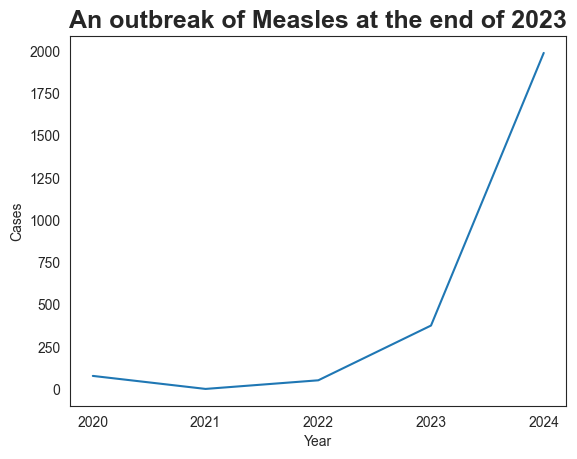

In [8]:
# Plot 1 - we noticed an outbreak of Measles at the end of 2023
plt.figure()
sns.set_style("white")
sns.lineplot(data=yearly_cases, x='Year', y='Cases')
plt.xticks(ticks=yearly_cases['Year'].unique())
plt.title('An outbreak of Measles at the end of 2023', fontsize = 18, fontweight='bold')
plt.savefig("yearly_measles_cases.png", dpi=300)


**STEP 3 - PLOT THE NUMBER OF CASES BY AGE_GROUP AND REGION**


In [9]:
# Plot 2 - Group by age groups
region_age_cases = measles_all_years.groupby(['Region','Age group'])['Cases'].sum().to_frame().reset_index()

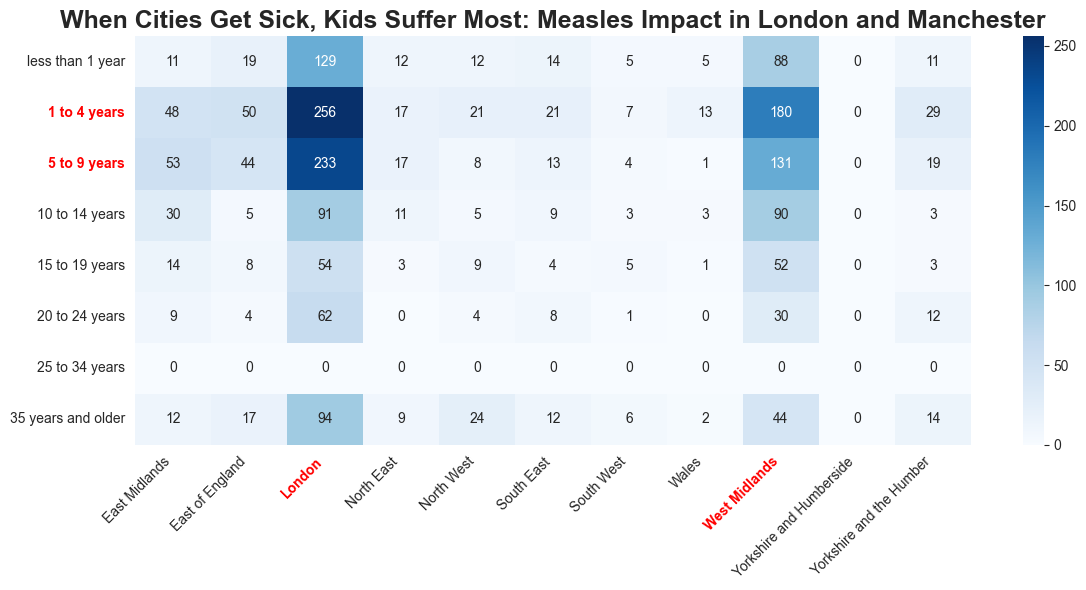

In [10]:
# Order the data by age groups for better visualisation
age_order = [
    'less than 1 year',
    '1 to 4 years',
    '5 to 9 years',
    '10 to 14 years',
    '15 to 19 years',
    '20 to 24 years',
    '25 to 34 years',
    '35 years and older'
]

region_age_cases['Age group'] = pd.Categorical(
    region_age_cases['Age group'],
    categories=age_order,
    ordered=True
)

heat_data = region_age_cases.pivot_table(index='Age group', columns='Region', values='Cases', aggfunc='sum',observed=False).loc[age_order]  # Ensures row order is kept
# Plot the heatmap based on cleaned data
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heat_data, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel('')
plt.ylabel('')

# Customise and highlight the years and age groups of interest
xtick_labels = ax.get_xticklabels()
for label in xtick_labels:
    if label.get_text() == "London" or label.get_text() == "West Midlands":
        label.set_color("red")
        label.set_fontweight("bold")
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

ytick_labels = ax.get_yticklabels()
for ylabel in ytick_labels:
    if ylabel.get_text() == "1 to 4 years" or ylabel.get_text() == "5 to 9 years":
        ylabel.set_color("red")
        ylabel.set_fontweight("bold")
ax.set_yticklabels(ytick_labels)

plt.title("When Cities Get Sick, Kids Suffer Most: Measles Impact in London and Manchester", fontsize=18, fontweight='bold')
plt.tight_layout()

# Save the Plot
plt.savefig("region_age_cases.png", dpi=300)
plt.show()
